### Imports

In [1]:
from dynaconf import settings
import sys
sys.path.append("..")
from src import db_tools as dbt
from src import ds_tools as dst

### Feature Selection

In [2]:
db = dbt.SQLiteDB(settings.DATABASE)
fs = dst.FeatureSelector(db)

Loading data ...
IDs loaded, 150029 rows
Loaded 5 features from set1
Loaded 5 features from set2
Loaded 9 features from set3
Loaded 10 features from set4
Loaded 10 features from set5
All data loaded successfully, shape: (150029, 41)
Found 0 features with missing fraction greater than 0.9
Found 8 features with disbalance fraction greater than 0.9
Found 4 features with correlation coefficient greater than 0.9
Deleted 12 useless features, shape: (150029, 29)
Calculating feature importances, permutation=True ...
Feature importances calculated, ROC-AUC score 0.7779
Top 14 features exported to file ../model/top_features.json


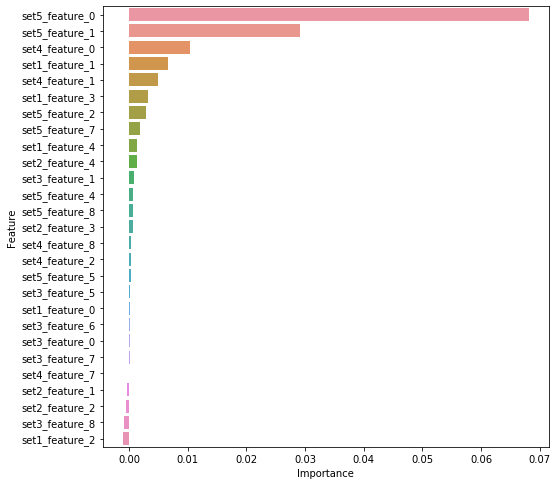

In [3]:
fs.run(source=settings.TRAIN_SOURCE, 
       filename=settings.FEATURE_SELECTION.top_features,
       target_column=settings.TARGET_COLUMN, 
       id_column=settings.ID_COLUMN,
       missing_threshold=settings.FEATURE_SELECTION.missing_threshold,
       disbalance_threshold=settings.FEATURE_SELECTION.disbalance_threshold,
       collinear_threshold=settings.FEATURE_SELECTION.collinear_threshold, 
       permutation=settings.FEATURE_SELECTION.permutation,
       permutation_threshold=settings.FEATURE_SELECTION.permutation_threshold,
       silent=settings.SILENT)

### Build Model

In [4]:
db = dbt.SQLiteDB(settings.DATABASE)
mb = dst.ModelBuilder(db, random_state=settings.MODEL_BUILDING.random_state)

Loading data ...
IDs loaded, 150029 rows
Loaded 3 features from set1
Loaded 2 features from set2
Loaded 1 features from set3
Loaded 2 features from set4
Loaded 6 features from set5
All data loaded successfully, shape: (150029, 16)
Categorical features not found
Holdout created, train shape: (120023, 16), holdout shape: (30006, 16)
Optimizing params ...
|   iter    |  target   | baggin... | colsam... | featur... | learni... |  max_bin  | max_depth | min_da... | min_ga... | num_it... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  22       |  0.783    |  0.736    |  0.749    |  0.7619   |  0.09358  |  514.2    |  14.69    |  399.8    |  0.02129  |  80.1     |  18.96    |  0.6851   |
|  32       |  0.7833   |  0.6102   |  0.7788   |  0.7526   |  0.07822  |  1.192e+0 |  11.51    |  394.0    |  0.01756  |  90.7     |  17.07    |  0.6443   |
Params optimi

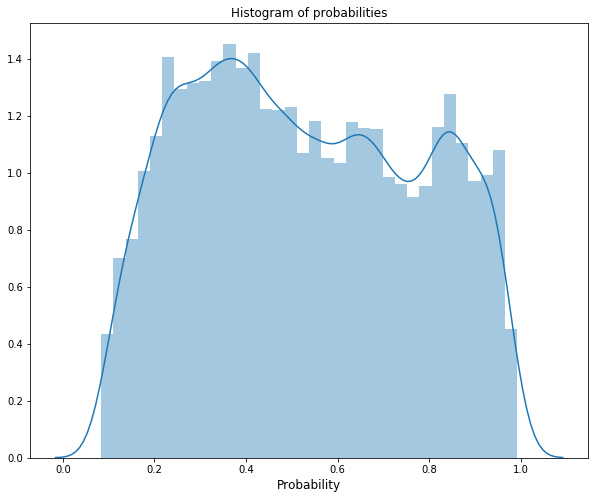

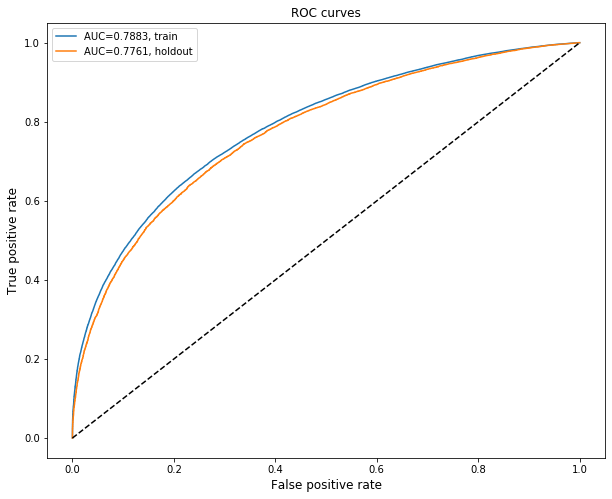

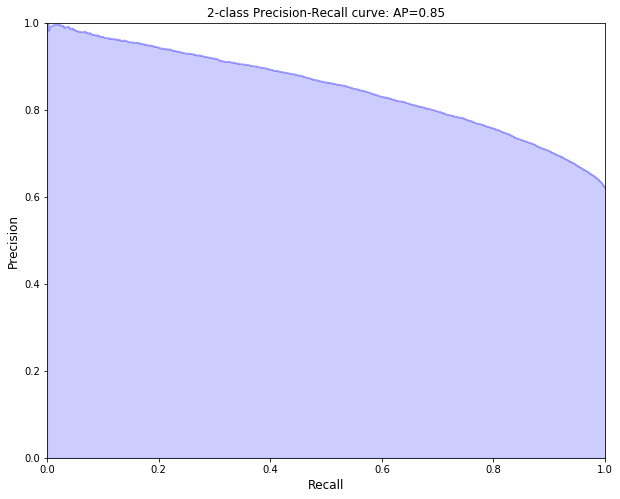

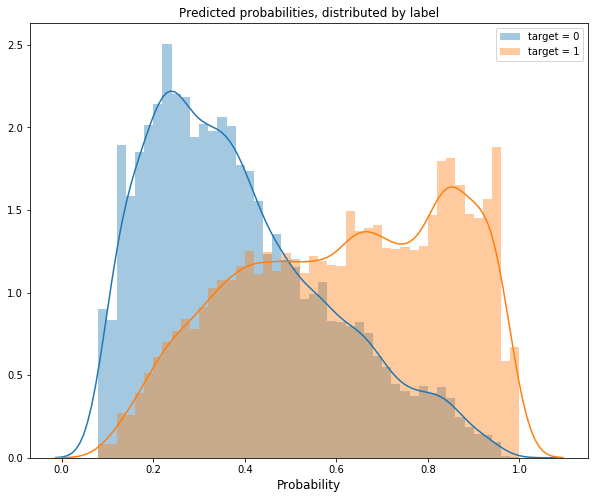

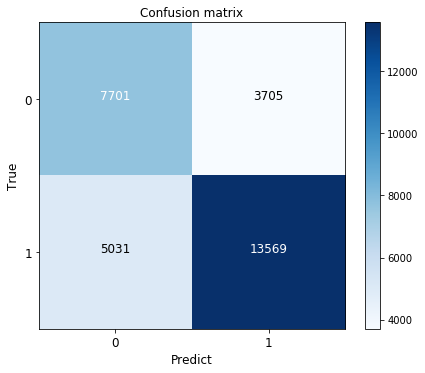

Threshold: 0.45
Precision: 78.6%
Recall: 73.0%
AUC: 70.2%


In [5]:
mb.run(source=settings.TRAIN_SOURCE, 
       params=dict(settings.MODEL_BUILDING['params_ranges']),
       target_column=settings.TARGET_COLUMN, 
       id_column=settings.ID_COLUMN, 
       feature_source=settings.FEATURE_SELECTION.top_features, 
       encode_filename=settings.MODEL_BUILDING['cat_dict'], 
       na_value=settings.FILL_NA,
       holdout_size=settings.MODEL_BUILDING['holdout_size'], 
       cv_splits=settings.MODEL_BUILDING['cv_splits'], 
       init_points=settings.MODEL_BUILDING['init_points'], 
       n_iter=settings.MODEL_BUILDING['n_iter'], 
       cm_threshold=settings.MODEL_BUILDING['cm_threshold'],
       model_filename=settings.MODEL_BUILDING['model'])